---
title: Lab 2
author: Sujanya Srinath
format:
    html:
        toc: true
        code-fold: true
theme: minty
embed-resources: true
---

# 0. Import the data and declare your package dependencies.

In [240]:
import numpy as np
import pandas as pd

In [241]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

# asked chatgpt how to suppress warnings in a quarto rendered document 

In [242]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)   # stack overflow to take out scientific notation - https://stackoverflow.com/questions/60167796/what-is-the-equivalent-of-optionsscipen-999-in-python

In [243]:
df_avocado = pd.read_csv("avocado-updated-2020.csv")
df_avocado.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington


In [244]:
df_avocado.dtypes

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

# 1. Briefly describe the data set. What information does it contain?

Ans: The avacado dataset provides information on pricing and weekly sales patterns over time across different regions.The columns of this particular dataset include date if type object which is the week in which the observation was recorded, the average price of value float which is the average price of a single avocado, the total volume which is a float which is the total number of avocados sold, 4046 which is a float which is the total number of avocados of reference number 4046 are sold, 4225 which is a float which is the total number of avocados of reference number 4225 are sold, 4770 which is a float which is the total number of avocados of reference number 4770 are sold, total bags of type float which is total number of bags sold, small, large and xlarge bags of type float which is the number of bags sold by size, type which is an object which is whether an avocado is conventional or organic, year of type int which is the year of the observation and geography of type object which is the geographical region of the observation - Object is usually a String datatype.

In [245]:
df_avocado.describe()  #from course notes

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,33045.00,33045.00,33045.00,33045.00,33045.00,33045.00,33045.00,33045.00,33045.00,33045.00
mean,1.38,968399.68,302391.41,279769.30,21482.55,364673.48,250198.02,106732.88,7742.58,2017.46
std,0.38,3934532.64,1301025.92,1151052.27,100160.70,1564004.00,1037734.18,516722.59,48198.03,1.70
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,1.10,15118.95,767.31,2712.47,0.00,9121.86,6478.63,466.29,0.00,2016.00
50%,1.35,129116.98,10994.77,23436.00,178.09,53222.24,36876.99,6375.86,0.00,2017.00
75%,1.62,505828.46,119021.85,135238.94,5096.53,174431.43,120662.40,40417.23,804.44,2019.00
max,3.25,63716144.15,22743616.17,20470572.61,2546439.11,31689188.60,20550406.59,13327600.76,1403184.04,2020.00


# 2. Clean the data in any way you see fit.

In [246]:
df_avocado.isnull().sum()  # no null values so do not need to drop any missing values

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [247]:
avocado_clean = df_avocado.drop_duplicates()

In [248]:
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])    # https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [249]:
unique_regions = avocado_clean['geography'].unique()
unique_regions

# https://pandas.pydata.org/docs/reference/api/pandas.unique.html

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York', 'Northeast',
       'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson',
       'Pittsburgh', 'Plains', 'Portland', 'Raleigh/Greensboro',
       'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
       'San Francisco', 'Seattle', 'South Carolina', 'South Central',
       'Southeast', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Total U.S.',
       'West', 'West Tex/New Mexico'], dtype=object)

In [250]:
def categorize_region(geography):
    if geography == 'Total U.S.':
        return 'National'
    elif geography in ['West', 'Northeast', 'South Central', 'Southeast', 'Midsouth', 'Great Lakes', 'Plains']:
        return 'Regional'
    elif geography in ['California', 'South Carolina']:
        return 'State'
    else:
        return 'Metro'

avocado_clean['region_type'] = avocado_clean['geography'].apply(categorize_region)

# used the apply function referenced from this website - https://saturncloud.io/blog/how-to-create-new-values-in-a-pandas-dataframe-column-based-on-values-from-another-column/#:~:text=To%20create%20the%20new%20column,and%20returns%20the%20corresponding%20category.

In [251]:
avocado_clean.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,Metro
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,Metro
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,Metro
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,Metro
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,Metro


In [252]:
avocado_clean = avocado_clean.rename(columns= {'4046':'small_avocados'})
avocado_clean = avocado_clean.rename(columns= {'4225':'medium_avocados'})
avocado_clean = avocado_clean.rename(columns= {'4770':'large_avocados'})
avocado_clean.head()

#course book

,date,average_price,total_volume,small_avocados,medium_avocados,large_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,Metro
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,Metro
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,Metro
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,Metro
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,Metro


# 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [253]:
avocado_small_organic_2017 = avocado_clean[(avocado_clean['year'] == 2017) & (avocado_clean['type'] == 'organic') & (avocado_clean['region_type'] == 'Regional')]
avocado_small_organic_2017.head()

,date,average_price,total_volume,small_avocados,medium_avocados,large_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type
11262,2017-01-01,1.44,104153.91,4104.86,69800.29,0.00,30248.76,23593.03,6655.73,0.00,organic,2017,Great Lakes,Regional
11282,2017-01-01,1.72,72287.79,3353.64,36090.72,1813.60,31029.83,29203.33,1826.50,0.00,organic,2017,Midsouth,Regional
11290,2017-01-01,2.00,115256.09,9132.13,36276.39,923.53,68924.04,65447.53,3476.51,0.00,organic,2017,Northeast,Regional
11302,2017-01-01,1.62,47042.21,4547.17,15245.73,1366.36,25882.95,17253.74,8629.21,0.00,organic,2017,Plains,Regional
11322,2017-01-01,1.23,66616.54,22474.95,4797.17,17.37,39327.05,37358.81,1968.24,0.00,organic,2017,South Central,Regional


In [254]:
total_small_by_region = avocado_small_organic_2017[["small_avocados", "region_type", "geography"]].groupby("geography").sum()
total_small_by_region

,small_avocados,region_type
geography,,
Great Lakes,202487.68,RegionalRegionalRegionalRegionalRegionalRegion...
Midsouth,186395.50,RegionalRegionalRegionalRegionalRegionalRegion...
Northeast,925832.36,RegionalRegionalRegionalRegionalRegionalRegion...
Plains,168583.40,RegionalRegionalRegionalRegionalRegionalRegion...
South Central,1717104.19,RegionalRegionalRegionalRegionalRegionalRegion...
Southeast,285124.34,RegionalRegionalRegionalRegionalRegionalRegion...
West,1870206.29,RegionalRegionalRegionalRegionalRegionalRegion...


In [255]:
total_small_by_region.loc[:, "small_avocados"].idxmax()

#course book .loc 

'West'

### The WEST region sold the most total organic, small Hass avocados in 2017

# 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [256]:
avocado_clean['Month'] = avocado_clean['date'].dt.month
avocado_clean['Day'] = avocado_clean['date'].dt.day
avocado_clean['Year'] = avocado_clean['date'].dt.year
avocado_clean.head()
# https://stackoverflow.com/questions/55776571/how-to-split-a-date-column-into-separate-day-month-year-column-in-pandas

,date,average_price,total_volume,small_avocados,medium_avocados,large_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type,Month,Day,Year
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,Metro,1,4,2015
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,Metro,1,4,2015
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,Metro,1,4,2015
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,Metro,1,4,2015
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,Metro,1,4,2015


In [257]:

average_volume_by_month = avocado_clean[["Month", "total_volume"]].groupby("Month").mean()

average_volume_by_month

# course book for groupby syntax

,total_volume
Month,
1,985312.16
2,1095373.83
3,995715.04
4,1016581.69
5,1123632.25
6,1051246.57
7,983268.10
8,949924.93
9,906477.26


In [258]:
average_volume_by_month.columns

Index(['total_volume'], dtype='object')

In [259]:
average_volume_by_month.loc[:, "total_volume"].idxmax()

np.int32(5)

### The month number 5 - MAY is the highest average volume of avocado sales

# 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [260]:
avocado_metro = avocado_clean[avocado_clean['region_type'] == 'Metro']


In [261]:
avocado_volume_by_metro = avocado_metro[['total_volume', 'geography']]
avocado_volume_by_metro.head()

,total_volume,geography
0,40873.28,Albany
1,1373.95,Albany
2,435021.49,Atlanta
3,3846.69,Atlanta
4,788025.06,Baltimore/Washington


In [262]:
total_volume_by_metro = avocado_volume_by_metro[["total_volume", "geography"]].groupby("geography").sum()
total_volume_by_metro.head()


,total_volume
geography,
Albany,34816335.50
Atlanta,198994117.74
Baltimore/Washington,276764634.10
Boise,30359552.56
Boston,204132518.89


In [263]:
highest = total_volume_by_metro.nlargest(1, 'total_volume')  # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html
highest

,total_volume
geography,
Los Angeles,959350488.02


In [264]:
top_five_highest = total_volume_by_metro.nlargest(5, 'total_volume')
top_five_highest


,total_volume
geography,
Los Angeles,959350488.02
New York,528245244.19
Dallas/Ft. Worth,436204160.85
Houston,420843846.87
Phoenix/Tucson,382523413.59


In [265]:
average_volume_by_metro = avocado_volume_by_metro[["total_volume", "geography"]].groupby("geography").mean()
average_volume_by_metro.head()

,total_volume
geography,
Albany,56889.44
Atlanta,325153.79
Baltimore/Washington,452229.79
Boise,49607.11
Boston,333549.87


In [266]:
top_5_average = average_volume_by_metro.nlargest(5, 'total_volume').reset_index()
top_5_average

,geography,total_volume
0,Los Angeles,1567566.16
1,New York,863145.82
2,Dallas/Ft. Worth,712751.90
3,Houston,687653.34
4,Phoenix/Tucson,625038.26


In [267]:
from plotnine import ggplot, geom_boxplot, aes

In [268]:
top_5_geographies = top_5_average['geography'].tolist()

In [269]:
individual_data = avocado_clean[avocado_clean['geography'].isin(top_5_geographies)]


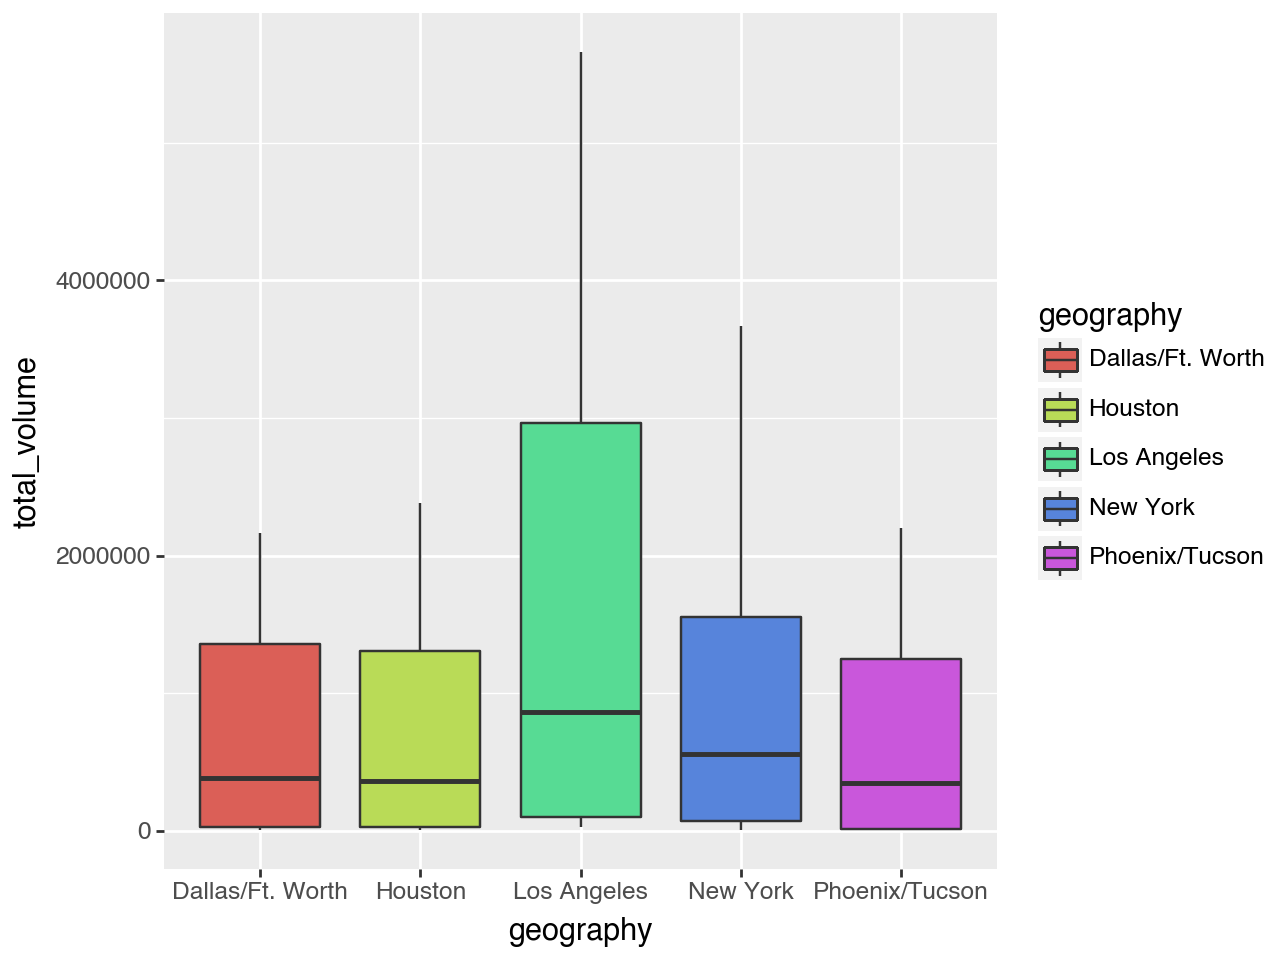

In [270]:
(ggplot(individual_data, aes(x='geography', y='total_volume', fill='geography'))
 + geom_boxplot())

# 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [271]:
california_cities = ['Los Angeles', 'San Diego', 'San Francisco', 'Sacramento']
avocado_california = avocado_clean[avocado_clean['geography'].isin(california_cities)]
avocado_california.head()
#chatgpt gave the .isin() syntax when prompted how to filter by a list of values

,date,average_price,total_volume,small_avocados,medium_avocados,large_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region_type,Month,Day,Year
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,Metro,1,4,2015
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,Metro,1,4,2015
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,Metro,1,4,2015
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,Metro,1,4,2015
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,Metro,1,4,2015


# 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [272]:
pivoted_california = avocado_california.pivot_table(index=['geography', 'date'],columns='type',values='average_price').reset_index() # using pivot_table instead of pivot because we want duplicates in the table , reset_index() preserves the column name so that it can be referenced again in the future

In [273]:
pivoted_california.head()

type,geography,date,conventional,organic
0,Los Angeles,2015-01-04,0.85,1.25
1,Los Angeles,2015-01-11,0.85,1.08
2,Los Angeles,2015-01-18,0.89,1.29
3,Los Angeles,2015-01-25,0.96,1.23
4,Los Angeles,2015-02-01,0.74,1.12


In [274]:
pivoted_california['price_difference'] = abs(pivoted_california['organic'] - pivoted_california['conventional'])   #abs so that we do not get negative numbers
pivoted_california.head()

type,geography,date,conventional,organic,price_difference
0,Los Angeles,2015-01-04,0.85,1.25,0.40
1,Los Angeles,2015-01-11,0.85,1.08,0.23
2,Los Angeles,2015-01-18,0.89,1.29,0.40
3,Los Angeles,2015-01-25,0.96,1.23,0.27
4,Los Angeles,2015-02-01,0.74,1.12,0.38


### Summary statistic by MEAN of the difference of prices:

In [275]:
average_diff_by_california_region = pivoted_california[["geography","price_difference"]].groupby("geography").mean().reset_index()

In [276]:
average_diff_by_california_region = average_diff_by_california_region.rename(columns={"price_difference": "average_price_difference"})
average_diff_by_california_region

type,geography,average_price_difference
0,Los Angeles,0.53
1,Sacramento,0.58
2,San Diego,0.68
3,San Francisco,0.72


In [277]:
average_diff_by_california_region.nlargest(1, 'average_price_difference').reset_index()


type,index,geography,average_price_difference
0,3,San Francisco,0.72


When averaged by mean, we can see that SAN FRANCISCO has the highest difference in mean of price of organic versus conventional avocados 

### Visulaization for mean:

In [278]:
mean_diff_geographies = average_diff_by_california_region['geography'].tolist()   # converting to list so that we get individual data points and not a single bar for mean based on the group

In [279]:
individual_data_2 = pivoted_california[pivoted_california['geography'].isin(mean_diff_geographies)]

In [280]:
from plotnine import scale_y_continuous

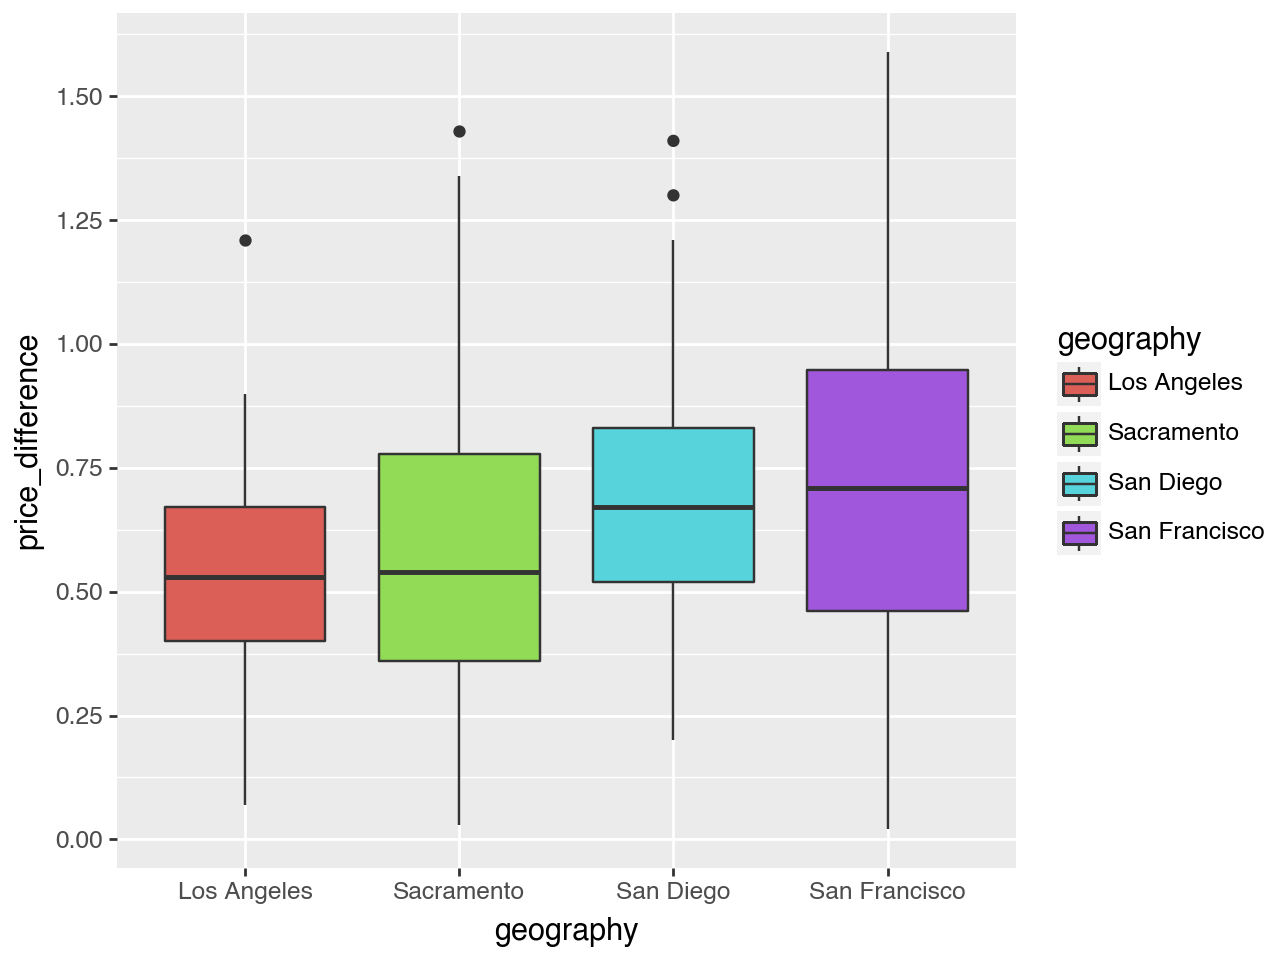

In [281]:
(ggplot(individual_data_2, aes(x='geography', y='price_difference', fill='geography'))
 + geom_boxplot()
 + scale_y_continuous(breaks=[0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]))

San Francisco has the highest mean of the differences between conventional and organic avocados. This shows that it has the highest difference between the prices of the organic and conventional avocados

### Summary statistic by STANDARD DEVIATION of the difference of prices:

In [282]:
std_diff_by_california_region = pivoted_california[["geography","price_difference"]].groupby("geography").std().reset_index()
std_diff_by_california_region = std_diff_by_california_region.rename(columns={"price_difference": "sd_price_difference"})

std_diff_by_california_region

type,geography,sd_price_difference
0,Los Angeles,0.19
1,Sacramento,0.27
2,San Diego,0.21
3,San Francisco,0.33


In [283]:
std_diff_by_california_region.nlargest(1, 'sd_price_difference')

type,geography,sd_price_difference
3,San Francisco,0.33


San Francisco has the highest standard deviation of the differences between conventional and organic avocados. This shows that there is greater variability in the price difference meaning that it has the highest difference between the prices of the organic and conventional avocados

### Visulaization for Standard Deviation:

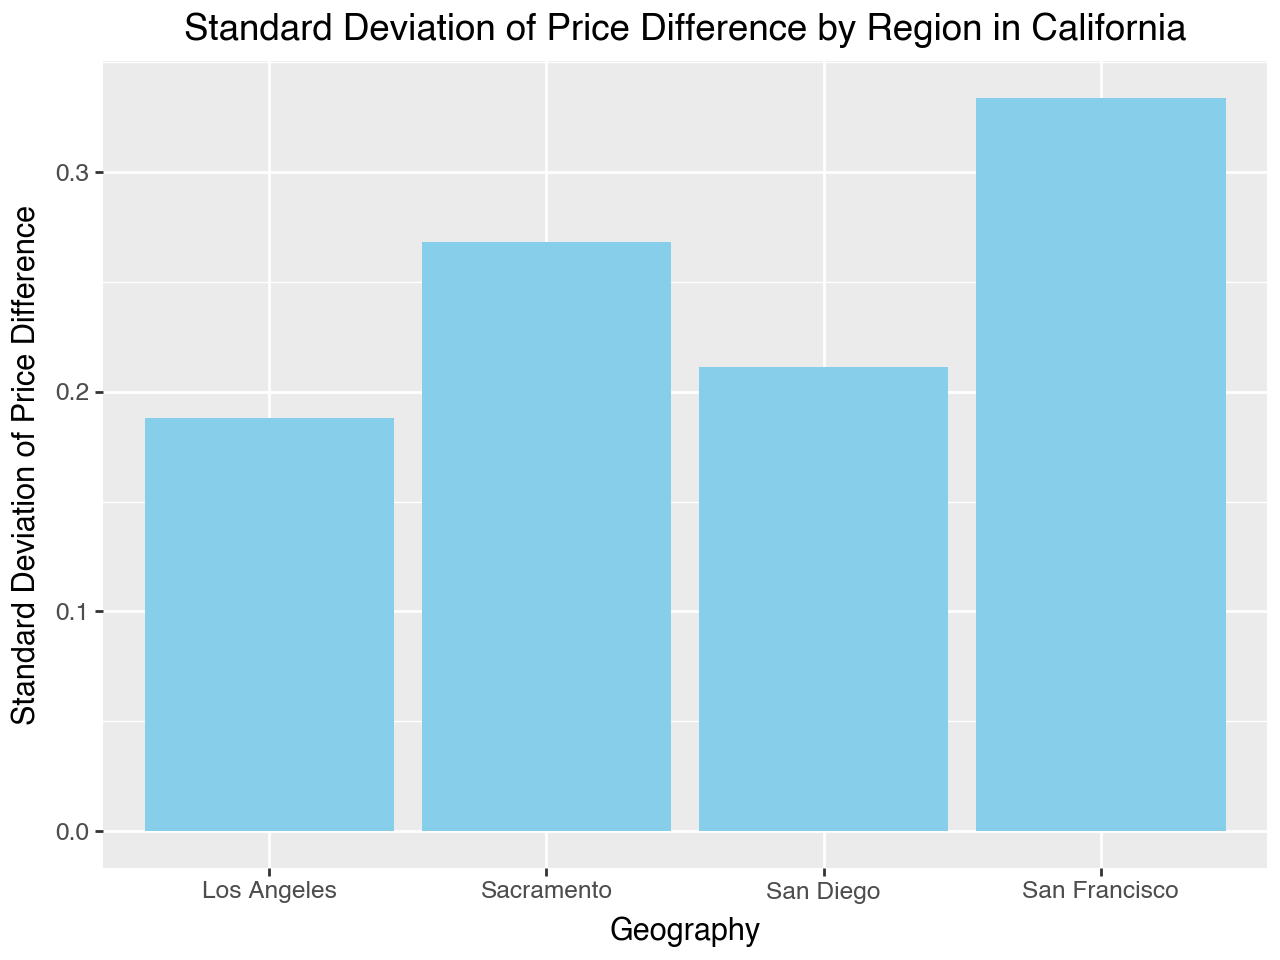

In [284]:
(ggplot(std_diff_by_california_region, aes(x='geography', y='sd_price_difference'))
  + geom_bar(stat='identity', fill='skyblue')
  + labs(title='Standard Deviation of Price Difference by Region in California',x='Geography',y='Standard Deviation of Price Difference') 
)

# 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [285]:
avocado_california.columns

Index(['date', 'average_price', 'total_volume', 'small_avocados',
       'medium_avocados', 'large_avocados', 'total_bags', 'small_bags',
       'large_bags', 'xlarge_bags', 'type', 'year', 'geography', 'region_type',
       'Month', 'Day', 'Year'],
      dtype='object')

In [286]:
avocado_california = avocado_california.rename(columns={"small_avocados": "Small", "medium_avocados": "Large", "large_avocados": "Xlarge"})
#renaming syntax - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

In [287]:
avocado_melted = avocado_california[['geography', 'type', 'Small', 'Large', 'Xlarge', 'Year', 'total_volume']] # course book
avocado_melted.head()

,geography,type,Small,Large,Xlarge,Year,total_volume
44,Los Angeles,conventional,1837999.65,524430.47,64225.78,2015,2682159.95
45,Los Angeles,organic,47721.51,1723.40,0.00,2015,54495.54
80,Sacramento,conventional,110693.69,270107.61,9737.50,2015,430138.88
81,Sacramento,organic,3727.52,4327.52,0.00,2015,9213.49
82,San Diego,conventional,244152.26,165299.33,15302.75,2015,461607.33


In [288]:
avocado_melted = avocado_melted.melt(id_vars=['geography', 'type', 'total_volume', 'Year'],value_vars=['Small', 'Large', 'Xlarge'],var_name='size',value_name='sales')
avocado_melted['size'] = pd.Categorical(avocado_melted['size'], categories= ['Xlarge', 'Large', 'Small'], ordered= True)     #https://plotnine.org/tutorials/miscellaneous-order-plot-series.html
avocado_melted = (avocado_melted.groupby(["type", "geography", "size", "Year"], as_index = False).agg(average_sales = ("sales", "mean")))

In [289]:
avocado_melted.head()

,type,geography,size,Year,average_sales
0,conventional,Los Angeles,Xlarge,2015,73707.97
1,conventional,Los Angeles,Xlarge,2016,80770.00
2,conventional,Los Angeles,Xlarge,2017,87347.26
3,conventional,Los Angeles,Xlarge,2018,81799.45
4,conventional,Los Angeles,Xlarge,2019,112245.68


In [290]:
from plotnine import geom_bar, facet_wrap, theme, element_text, labs, scale_fill_manual, scale_y_continuous

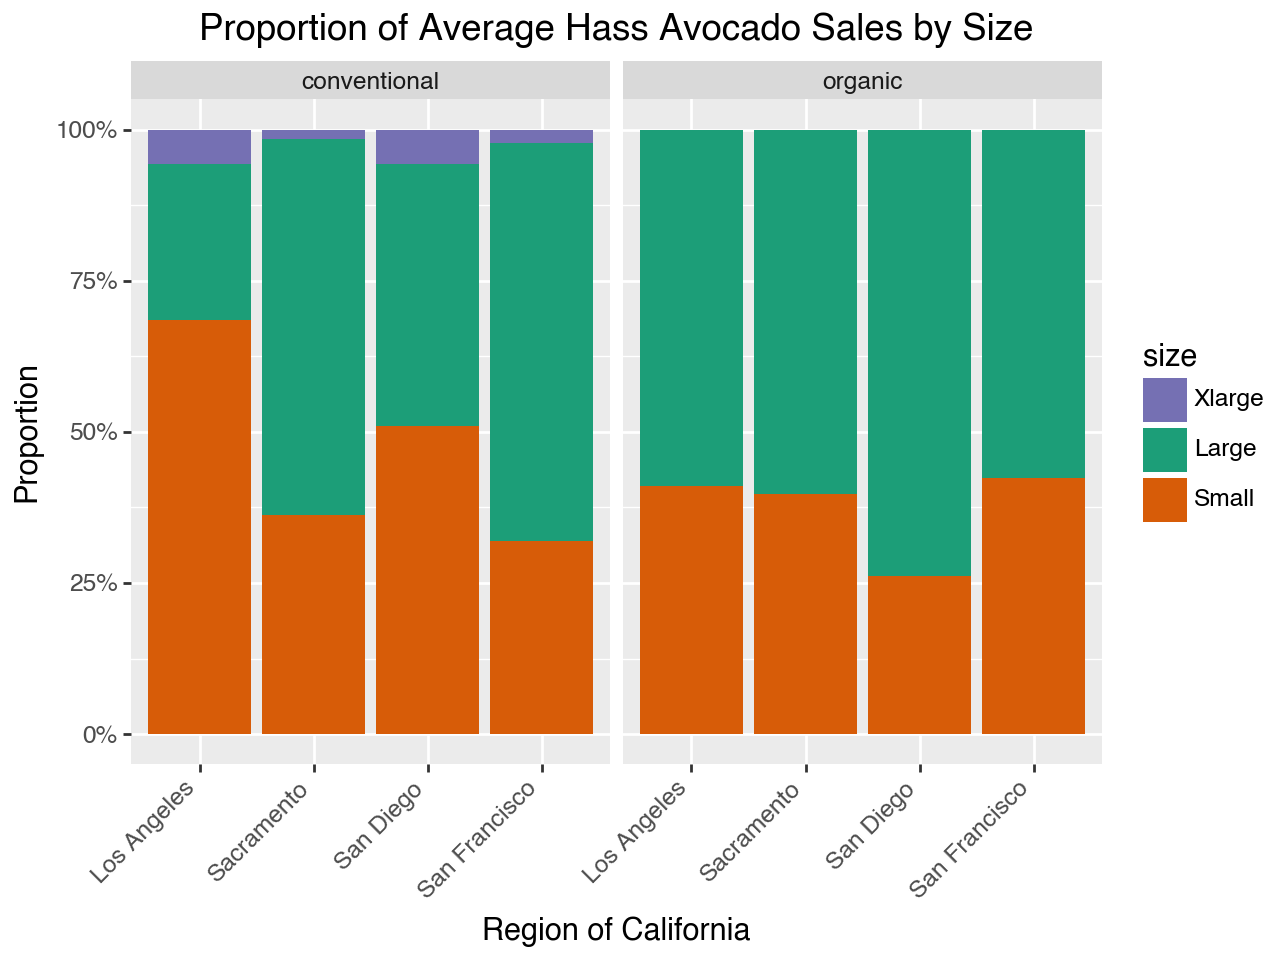

In [291]:
(ggplot(avocado_melted, aes(x='geography', y='average_sales', fill='size'))
        + geom_bar(stat='identity', position='fill')
        + facet_wrap('~type')
        + theme(axis_text_x=element_text(rotation=45, hjust=1))   #asked chatgpt how to rotate the x axis variables at an angle
        + labs(title="Proportion of Average Hass Avocado Sales by Size",
               x="Region of California", y="Proportion")
        + scale_y_continuous(breaks=[0, 0.25, 0.5, 0.75, 1.0], labels=['0%', '25%', '50%', '75%', '100%'] )
        + scale_fill_manual(values={'Small': '#d75c08', 'Large':'#1c9e78', 'Xlarge':'#7570b3'}))    #color picker online - https://imagecolorpicker.com/

# Using Outside Data

In [292]:
from plotnine import geom_point, geom_smooth, geom_line, stat_smooth

In [293]:
avocado_california = avocado_california.groupby(['year', 'geography']).agg(mean_total_volume=('total_volume', 'mean')).reset_index()

In [294]:
avocado_california.columns

Index(['year', 'geography', 'mean_total_volume'], dtype='object')

In [295]:
avocado_california.head()

,year,geography,mean_total_volume
0,2015,Los Angeles,1425198.97
1,2015,Sacramento,211351.33
2,2015,San Diego,255631.98
3,2015,San Francisco,379286.56
4,2016,Los Angeles,1568675.99


### dataset from: https://www.car.org/marketdata/data/housingdata/

In [296]:
df_housing = pd.read_csv("housing_dataset.csv")
df_housing.head()

,Mon-Yr,CA,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,Glenn,Humboldt,Imperial,Kern,Kings,Lake,Lassen,Los Angeles,Madera,Marin,Mariposa,Mendocino,Merced,Mono,Monterey,Napa,Nevada,Orange,Placer,Plumas,Riverside,Sacramento,San Benito,San Bernardino,San Diego,San Francisco,San Joaquin,San Luis Obispo,San Mateo,Santa Barbara,Santa Clara,Santa Cruz,Shasta,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,Unnamed: 55,Condo,LA Metro,Central Coast,Central Valley,Far North,Inland Empire,S.F. Bay Area,SoCal
0,Jan-90,"$194,952","$226,149",NaN,"$102,143",NaN,NaN,NaN,NaN,"$82,083",NaN,"$79,642",NaN,"$85,892",NaN,NaN,NaN,"$215,338",NaN,"$346,153",NaN,"$140,000","$83,889","$93,291","$233,333","$178,888",NaN,"$231,274","$182,220",NaN,"$136,832","$123,000",NaN,"$128,806","$180,484","$287,499","$105,000","$227,522",NaN,"$273,071","$271,840","250,000",NaN,NaN,NaN,"$174,022",NaN,NaN,NaN,NaN,"$86,999",NaN,"$250,410",NaN,NaN,NaN,"$141,519","$203,390",NaN,NaN,NaN,NaN,"$227,366",NaN
1,Feb-90,"$196,273","$219,306",NaN,"$83,333",NaN,NaN,NaN,NaN,"$87,187",NaN,"$83,571",NaN,"$80,294",NaN,NaN,NaN,"$208,399",NaN,"$338,333",NaN,"$116,666","$77,499",NaN,"$187,856","$186,363",NaN,"$233,656","$182,630",NaN,"$136,021","$126,900",NaN,"$124,545","$180,714","$300,877","$102,500","$236,377",NaN,"$259,668","$273,100","261,607",NaN,NaN,NaN,"$180,294",NaN,NaN,NaN,NaN,"$84,375",NaN,"$235,760",NaN,NaN,NaN,"$144,965","$211,024",NaN,NaN,NaN,NaN,"$234,739",NaN
2,Mar-90,"$194,856","$225,162",NaN,"$100,000",NaN,NaN,NaN,NaN,"$83,889",NaN,"$88,888",NaN,"$87,758",NaN,NaN,NaN,"$208,135",NaN,"$358,571",NaN,"$111,428","$85,909",NaN,"$230,555","$180,000",NaN,"$242,312","$179,470",NaN,"$135,835","$127,500",NaN,"$127,017","$183,701","$290,151","$117,692","$216,010",NaN,"$253,301","$275,500","260,577",NaN,NaN,NaN,"$178,823",NaN,NaN,NaN,NaN,"$84,210",NaN,"$240,320",NaN,NaN,NaN,"$141,132","$209,286",NaN,NaN,NaN,NaN,"$235,337",NaN
3,Apr-90,"$196,111","$229,333",NaN,"$108,000",NaN,NaN,NaN,NaN,"$85,428",NaN,"$83,500",NaN,"$80,323",NaN,NaN,NaN,"$219,004",NaN,"$359,574",NaN,"$133,333","$84,285",NaN,"$238,095","$158,571",NaN,"$239,380","$200,000",NaN,"$134,629","$135,500",NaN,"$131,485","$181,567","$288,725","$112,692","$189,246",NaN,"$217,363","$274,660","255,263",NaN,NaN,NaN,"$184,117",NaN,NaN,NaN,NaN,"$88,928",NaN,"$230,620",NaN,NaN,NaN,"$145,707","$210,302",NaN,NaN,NaN,NaN,"$233,178",NaN
4,May-90,"$195,281","$232,291",NaN,"$100,000",NaN,NaN,NaN,NaN,"$88,749",NaN,"$79,062",NaN,"$86,562",NaN,NaN,NaN,"$209,065",NaN,"$374,999",NaN,"$138,749","$100,000",NaN,"$259,375","$187,692",NaN,"$256,401","$194,610",NaN,"$140,823","$138,000",NaN,"$130,538","$180,794","$282,626","$112,778","$199,325",NaN,"$227,609","$266,670","262,500",NaN,NaN,NaN,"$185,844",NaN,NaN,NaN,NaN,"$85,999",NaN,"$235,320",NaN,NaN,NaN,"$146,060","$210,148",NaN,NaN,NaN,NaN,"$235,881",NaN


In [297]:
df_housing.columns

Index(['Mon-Yr', 'CA', 'Alameda', 'Amador', 'Butte', 'Calaveras',
       'Contra-Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera',
       'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Mono', 'Monterey', 'Napa',
       'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba', 'Unnamed: 55', 'Condo', 'LA Metro',
       'Central Coast', 'Central Valley', 'Far North', 'Inland Empire',
       'S.F. Bay Area', 'SoCal'],
      dtype='object')

In [298]:
df_housing = df_housing[['Mon-Yr', 'San Diego', 'San Francisco', 'Los Angeles','Sacramento']]

In [299]:
df_housing.dtypes

Mon-Yr           object
San Diego        object
San Francisco    object
Los Angeles      object
Sacramento       object
dtype: object

In [300]:
# asked chatgpt how to convert the Mon-Yr column with 2 types of formats of the date into a datetime variable

def convert_date(value):
    try:
        return pd.to_datetime(value, format='%b-%y')
    except:
        try:
            return pd.to_datetime(value, format='%y-%b')
        except:
            return pd.NaT

df_housing['Mon-Yr'] = df_housing['Mon-Yr'].apply(convert_date)

df_housing['Year'] = df_housing['Mon-Yr'].dt.year

df_housing[['Mon-Yr', 'Year']].head()

,Mon-Yr,Year
0,1990-01-01,1990.00
1,1990-02-01,1990.00
2,1990-03-01,1990.00
3,1990-04-01,1990.00
4,1990-05-01,1990.00


In [301]:
columns_to_convert = ['San Diego', 'San Francisco', 'Los Angeles', 'Sacramento']
for column in columns_to_convert:
    df_housing[column] = df_housing[column].replace('[\$,]', '', regex=True).astype(int)
 # asked chatgpt how to remove dollar signs and commas before converting to integers

In [302]:
df_housing.head()

,Mon-Yr,San Diego,San Francisco,Los Angeles,Sacramento,Year
0,1990-01-01,180484,287499,215338,123000,1990.00
1,1990-02-01,180714,300877,208399,126900,1990.00
2,1990-03-01,183701,290151,208135,127500,1990.00
3,1990-04-01,181567,288725,219004,135500,1990.00
4,1990-05-01,180794,282626,209065,138000,1990.00


In [303]:
df_housing.dtypes

Mon-Yr           datetime64[ns]
San Diego                 int64
San Francisco             int64
Los Angeles               int64
Sacramento                int64
Year                    float64
dtype: object

In [304]:
df_housing = df_housing.dropna(subset=['Year'])   #course book

In [305]:
df_housing['year'] = df_housing['Year'].astype(int)

In [306]:
df_housing.head()

,Mon-Yr,San Diego,San Francisco,Los Angeles,Sacramento,Year,year
0,1990-01-01,180484,287499,215338,123000,1990.00,1990
1,1990-02-01,180714,300877,208399,126900,1990.00,1990
2,1990-03-01,183701,290151,208135,127500,1990.00,1990
3,1990-04-01,181567,288725,219004,135500,1990.00,1990
4,1990-05-01,180794,282626,209065,138000,1990.00,1990


In [307]:
df_housing = df_housing[(df_housing['year'] >= 2015) & (df_housing['year'] <= 2020)]
df_housing.head()

,Mon-Yr,San Diego,San Francisco,Los Angeles,Sacramento,Year,year
300,2015-01-01,496380,986610,441610,256670,2015.00,2015
301,2015-02-01,499000,1154760,419260,283960,2015.00,2015
302,2015-03-01,530650,1275000,419370,282080,2015.00,2015
303,2015-04-01,530810,1348480,427010,283600,2015.00,2015
304,2015-05-01,538660,1375000,432570,293480,2015.00,2015


In [308]:
df_filtered = df_housing.melt(id_vars=['year'], value_vars=['San Diego', 'San Francisco', 'Los Angeles', 'Sacramento'], var_name='geography', value_name='average_house_price')
df_filtered.head()

,year,geography,average_house_price
0,2015,San Diego,496380
1,2015,San Diego,499000
2,2015,San Diego,530650
3,2015,San Diego,530810
4,2015,San Diego,538660


In [309]:
df_filtered = df_filtered.groupby(['geography', 'year']).agg(average_house_price=('average_house_price', 'mean')).reset_index()
df_filtered.head()

,geography,year,average_house_price
0,Los Angeles,2015,465314.17
1,Los Angeles,2016,493738.75
2,Los Angeles,2017,533139.17
3,Los Angeles,2018,572350.00
4,Los Angeles,2019,591863.33


In [310]:
merged_house_prices3 = avocado_california.merge(df_filtered, on=["year", "geography"])
merged_house_prices3.head()

,year,geography,mean_total_volume,average_house_price
0,2015,Los Angeles,1425198.97,465314.17
1,2015,Sacramento,211351.33,286941.67
2,2015,San Diego,255631.98,530075.83
3,2015,San Francisco,379286.56,1245519.17
4,2016,Los Angeles,1568675.99,493738.75


In [311]:
from plotnine import scale_color_manual

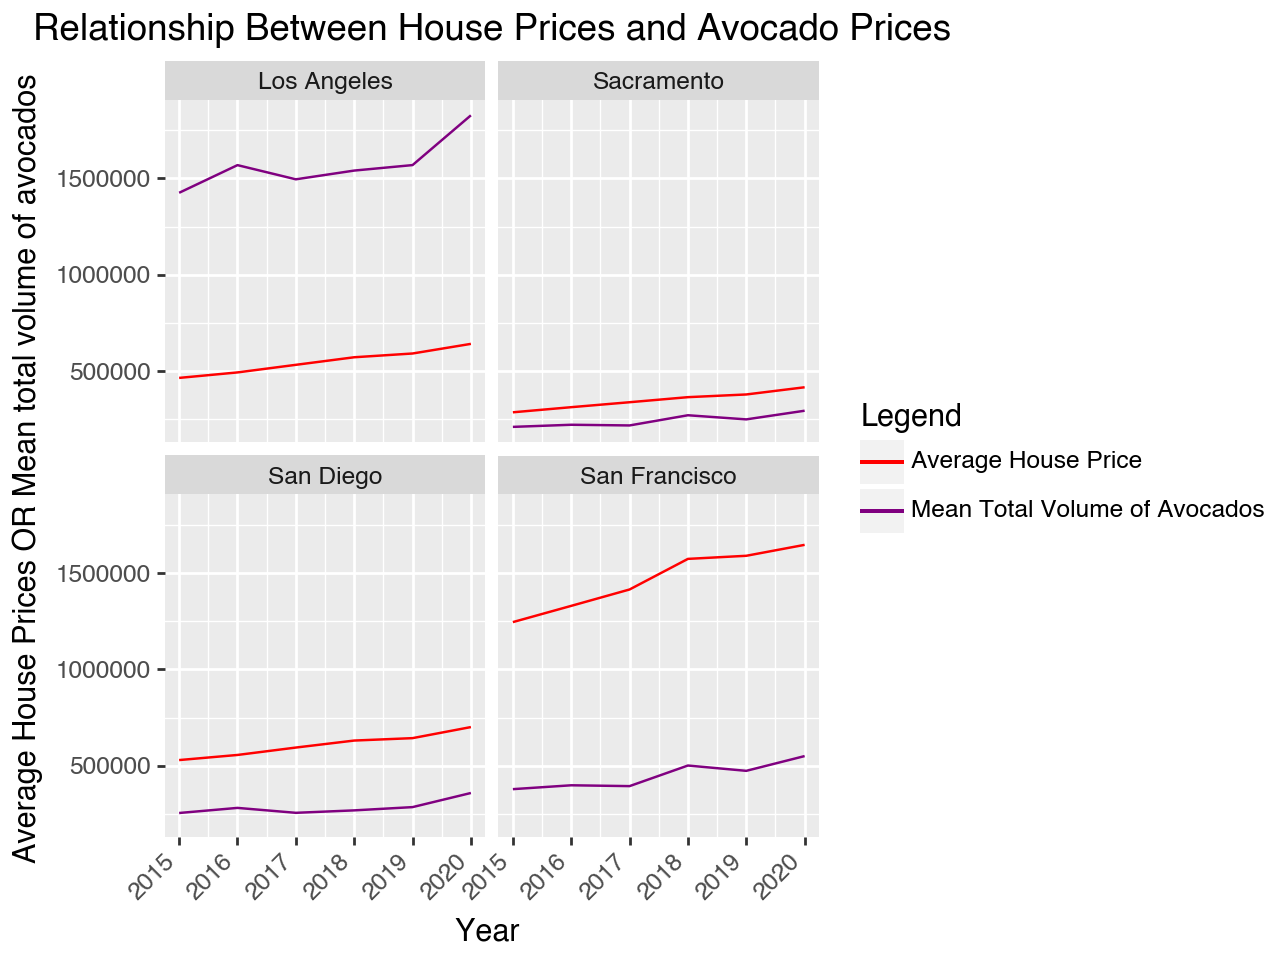

In [312]:
(ggplot(merged_house_prices3, aes(x='year'))
        + geom_line(aes(y='average_house_price', color="'Average House Price'"))         #asked chatgpt how to get the color of each line plot a different color
        + geom_line(aes(y='mean_total_volume', color = "'Mean Total Volume of Avocados'"))
        + labs(title='Relationship Between House Prices and Avocado Prices',
               x='Year ',
               y='Average House Prices OR Mean total volume of avocados')
        + theme(axis_text_x=element_text(rotation=45, hjust=1))
         + facet_wrap('geography')
         + scale_color_manual(
        values={
            'Average House Price': 'red',
            'Mean Total Volume of Avocados': 'purple'
        },
        name='Legend'
    )   )

### Analysis:

The average price of a home has increased overall between 2015 and 2020 in all regions. Over time, the average total volume of avocados has varied but there is no clear increase or decrease in the trend. This shows that there is not a very strong correlation between  house prices and avocado volume. The evidence does not support the hypothesis in the meme that Millennials' consumption of avocado toast prevents them from being able to afford homes. There may be other factors that influence whether millenials can buy homes and the rising home prices. This plot shows that even though eating avocado toast may be a factor in milenials not being able to afford houses, it is definitely not the main factor or an important factor.